# Utilities

This file hosts a fw simple utility functions that are loosely programmed and can be used to transform the TXT files from various experiments into LaTeX tables or plots.

LaTeX table generation is made with help from ChatGPT-4. Plot generation is a copy of any experiment code, just with added parameters for some malleability.

In [4]:
# Imports
import matplotlib.pyplot as plt
import numpy as np


In [29]:
# TXT to LaTeX table; just need to set the indexes of rows later.
# Created with help from ChatGPT-4 for simpler eiditing of the LaTeX document. 
# The tables need some manual modifying sometimes (title, label)
# Also note the "/tiny" command whihc may not be appropriate for small tables.
# Use /small or omit it alltogether then.
#
# The author is not responsible if it does not work for you ;)

import json

def txt_to_latex(input_file_path, output_file_path):
    with open(input_file_path, 'r') as file:
        data = json.load(file)

    # Dynamic columns based on JSON keys
    column_keys = list(data.keys())
    num_columns = len(column_keys)
    
    # Generate LaTeX table header
    latex_header = """
\\begin{table}[!ht]
\\tiny % Use super small font
\centering
"""
    latex_header += "\\begin{tabular}{@{}" + "c" * (num_columns + 1) + "@}{}" + " \\\\ \n"
    latex_header += "\\toprule \n"
    latex_header += "Ineq. No. & " + " & ".join(key[:4] for key in column_keys) + " \\\\ \n"
    latex_header += "\\midrule \n"

    # Generate table content dynamically
    max_length = max(len(data[key]) for key in column_keys)
    latex_content = ""
    
    for i in range(max_length):
        row = [str(i + 1)]  # Row label (Ineq. No.)
        for key in column_keys:
            # Check if the current key has enough data for this row index
            if i < len(data[key]):
                row.append(f"{data[key][i]:.0f}")
            else:
                row.append("N/A")  # Handling missing data
        latex_content += " & ".join(row) + " \\\\ \n"

    # LaTeX table footer
    latex_footer = """
\\bottomrule    
\\end{tabular}\n\\caption{ADD CAPTION HERE!}\n\\label{tab:todo_add_label}\n\\end{table}
\\newpage
"""

    # Complete latex document
    latex_table = latex_header + latex_content + latex_footer

    # Save to file
    with open(output_file_path, 'w') as file:
        file.write(latex_table)

# Sample usage
file_path = 'Final Results/Experiment 3 - Input Structure and Shuffling/Experiment3_100-1000_RAWDATA_30iters.txt'
output_file_path = 'Experiment3_100-1000_RAWDATA_LATEX'

txt_to_latex(file_path, output_file_path)


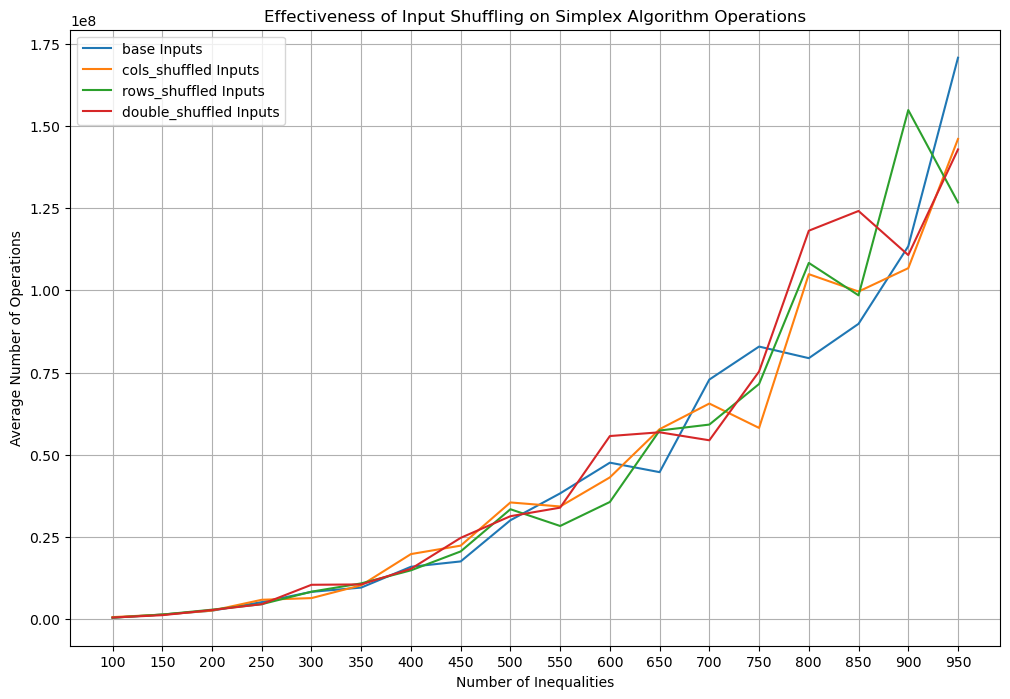

In [32]:
# Plotting a graph from a TXT file, useful if need to change the labels etc later.

# Pretty much a direct copy of any experiments plotting function.
def txt_to_plot(file_path, x_label, y_label, title, x_axis_min, x_axis_max, step=1):
    with open(file_path, 'r') as file:
        data = json.load(file)

    x_axis_range = np.linspace(x_axis_min, x_axis_max, num=len(data[list(data.keys())[0]]))

    plt.figure(figsize=(12, 8))
    for input_type in data:
        if len(x_axis_range) != len(data[input_type]):
            print(f'Warning: Length mismatch for {input_type}. Expected {len(x_axis_range)}, got {len(data[input_type])}')
        plt.plot(x_axis_range, data[input_type], label=f'{input_type} Inputs')  


    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.legend()
    plt.grid(True)

    tick_positions = np.arange(x_axis_min, x_axis_max + 1, step)
    plt.xticks(tick_positions)

    plt.show()


txt_to_plot(
    file_path='/Users/mihkeluutar/UniTartu/Thesis/Final Results/Experiment 3 - Input Structure and Shuffling/Experiment3_100-950_RAWDATA_30iters.txt',
    title='Effectiveness of Input Shuffling on Simplex Algorithm Operations',
    y_label='Average Number of Operations',
    x_label='Number of Inequalities',
    x_axis_min=100,
    x_axis_max=950,
    step=50
)     